In [1]:
import glob
glob.glob('*.csv')

['Rain Prediction Test.csv', 'Rain Prediction Train.csv']

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [25]:
# importing the data

data = pd.read_csv('Rain Prediction Train.csv')

In [26]:
#check the shape of the dataset

print("There are {} rows and {} coloumns".format(data.shape[0],data.shape[1]))

There are 100000 rows and 23 coloumns


In [27]:
# To see first 5 observations from the dataset

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,07-02-2014,CoffsHarbour,17.7,25.9,2.2,1.6,NaN,NNE,31.0,SW,...,76.0,66.0,1017.3,1016.5,7.0,4.0,21.5,24.2,Yes,No
1,23-04-2009,Portland,6.7,22.0,0.0,5.4,0.4,NNE,44.0,NE,...,65.0,37.0,1014.0,1008.8,7.0,8.0,14.0,21.8,No,Yes
2,08-11-2015,Watsonia,6.2,25.7,0.0,4.2,10.9,WSW,20.0,SE,...,71.0,28.0,1022.5,1019.4,2.0,7.0,12.8,23.6,No,No
3,21-11-2012,Wollongong,13.8,22.8,0.0,NaN,NaN,SSW,70.0,N,...,65.0,76.0,1017.0,1010.6,NaN,NaN,18.9,20.6,No,No
4,30-07-2013,Townsville,13.4,27.2,0.0,6.0,10.2,ENE,30.0,SSW,...,61.0,46.0,1016.8,1011.8,1.0,1.0,21.7,25.6,No,No


In [28]:
# To know the data type of each feature

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
Date             100000 non-null object
Location         100000 non-null object
MinTemp          99564 non-null float64
MaxTemp          99784 non-null float64
Rainfall         99030 non-null float64
Evaporation      57367 non-null float64
Sunshine         52518 non-null float64
WindGustDir      93419 non-null object
WindGustSpeed    93460 non-null float64
WindDir9am       92938 non-null object
WindDir3pm       97309 non-null object
WindSpeed9am     99062 non-null float64
WindSpeed3pm     98146 non-null float64
Humidity9am      98762 non-null float64
Humidity3pm      97456 non-null float64
Pressure9am      90163 non-null float64
Pressure3pm      90188 non-null float64
Cloud9am         62372 non-null float64
Cloud3pm         59989 non-null float64
Temp9am          99380 non-null float64
Temp3pm          98090 non-null float64
RainToday        99030 non-null object
RainTomorrow  

In [36]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype('category') 
    else:
        pass

In [37]:
# To know the data type of each feature

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
Date             100000 non-null category
Location         100000 non-null category
MinTemp          99564 non-null float64
MaxTemp          99784 non-null float64
Rainfall         99030 non-null float64
Evaporation      57367 non-null float64
Sunshine         52518 non-null float64
WindGustDir      93419 non-null category
WindGustSpeed    93460 non-null float64
WindDir9am       92938 non-null category
WindDir3pm       97309 non-null category
WindSpeed9am     99062 non-null float64
WindSpeed3pm     98146 non-null float64
Humidity9am      98762 non-null float64
Humidity3pm      97456 non-null float64
Pressure9am      90163 non-null float64
Pressure3pm      90188 non-null float64
Cloud9am         62372 non-null float64
Cloud3pm         59989 non-null float64
Temp9am          99380 non-null float64
Temp3pm          98090 non-null float64
RainToday        99030 non-null category
Ra

In [38]:
# We see there are some columns with null values. 
# Before we start pre-processing, let's find out which of the columns have maximum number of null values.

data.count().sort_values()

Sunshine          52518
Evaporation       57367
Cloud3pm          59989
Cloud9am          62372
Pressure9am       90163
Pressure3pm       90188
WindDir9am        92938
WindGustDir       93419
WindGustSpeed     93460
WindDir3pm        97309
Humidity3pm       97456
Temp3pm           98090
WindSpeed3pm      98146
Humidity9am       98762
Rainfall          99030
RainToday         99030
WindSpeed9am      99062
Temp9am           99380
MinTemp           99564
MaxTemp           99784
Date             100000
Location         100000
RainTomorrow     100000
dtype: int64

In [86]:
# As we can see the first four columns have less than 60% data, we can ignore these four columns
# We don't need the location column because we are going to find if it will rain in Australia or not
# We are going to drop the date column too.

df = data.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','Date'],axis=1)
df.shape

(100000, 17)

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,99564.0,12.190559,6.412850,-8.5,7.6,12.0,16.9,33.9
MaxTemp,99784.0,23.228404,7.117851,-4.8,17.9,22.6,28.2,47.3
Rainfall,99030.0,2.346882,8.357515,0.0,0.0,0.0,0.6,278.4
WindGustSpeed,93460.0,39.986818,13.589459,7.0,31.0,39.0,48.0,135.0
WindSpeed9am,99062.0,14.008045,8.898406,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,98146.0,18.623846,8.797918,0.0,13.0,19.0,24.0,87.0
Humidity9am,98762.0,68.845599,19.064754,1.0,57.0,70.0,83.0,100.0
Humidity3pm,97456.0,51.491155,20.824180,0.0,37.0,52.0,66.0,100.0
Pressure9am,90163.0,1017.631809,7.105450,980.5,1012.9,1017.6,1022.4,1041.0
Pressure3pm,90188.0,1015.242128,7.032167,977.1,1010.4,1015.2,1020.0,1039.6


### Observations :

- There is temperature recorded **min(-4.8) and max(47.3) centi grade.**

## Data Visualization :

In [42]:
df['RainTomorrow'].value_counts()

No     77505
Yes    22495
Name: RainTomorrow, dtype: int64

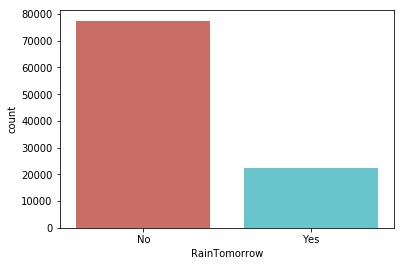

In [43]:
sns.countplot(x='RainTomorrow',data=df, palette='hls')
plt.show()

- There are 77505 no's and 22495 yes's in the outcome variables.

In [46]:
# Let's get a sense of the numbers across the two classes

df.groupby('RainTomorrow').mean()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
RainTomorrow,,,,,,,,,,,,
No,11.898149,23.837724,1.272826,38.286901,13.568437,18.203155,66.217933,46.513838,1018.576315,1016.097264,17.074034,22.401886
Yes,13.199254,21.130796,6.101176,45.940171,15.524002,20.078485,77.955314,68.768811,1014.384159,1012.299409,16.685381,19.203592


## Observations :

- To Rain Tomorrow the average **Humidity3pm** is more compared to *not to rain Humidity3pm.* <br>
- here,The MaxTemp is less for the RainTomorrow means if the recorded max temperature is leass then its also favouring to rain.<br>


In [150]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [151]:
#Let us get rid of all null values in df

df = df.dropna(how='any')
df.shape

(79413, 17)

In [219]:
100000 - 79413


20587

In [152]:
categorical_data = df.select_dtypes(include='category')
numerical_data = df.select_dtypes(include=('int64','float64'))

print(categorical_data.shape)
print(numerical_data.shape)

(79413, 5)
(79413, 12)


Text(0,0.5,'Frequency of Rain Tomorrow Yes or No')

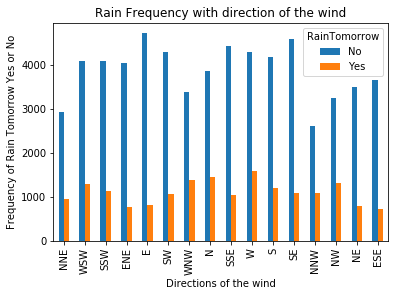

In [153]:
#The direction of the strongest wind gust in the 24 hours to midnight

%matplotlib inline
pd.crosstab(categorical_data.WindGustDir,categorical_data.RainTomorrow).plot(kind='bar')
plt.title('Rain Frequency with direction of the wind')
plt.xlabel('Directions of the wind')
plt.ylabel('Frequency of Rain Tomorrow Yes or No')

Text(0,0.5,'Frequency of Rain Tomorrow Yes or No')

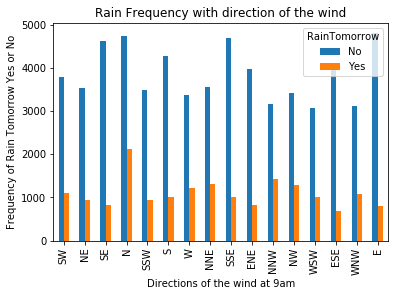

In [154]:
%matplotlib inline
pd.crosstab(categorical_data.WindDir9am,categorical_data.RainTomorrow).plot(kind='bar')
plt.title('Rain Frequency with direction of the wind')
plt.xlabel('Directions of the wind at 9am')
plt.ylabel('Frequency of Rain Tomorrow Yes or No')

Text(0,0.5,'Frequency of Rain Tomorrow Yes or No')

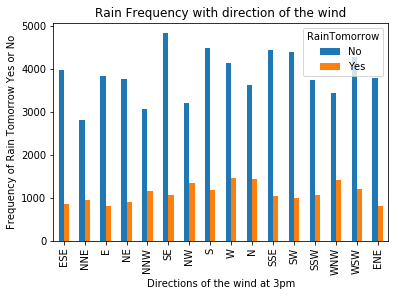

In [155]:
%matplotlib inline
pd.crosstab(categorical_data.WindDir3pm,categorical_data.RainTomorrow).plot(kind='bar')
plt.title('Rain Frequency with direction of the wind')
plt.xlabel('Directions of the wind at 3pm')
plt.ylabel('Frequency of Rain Tomorrow Yes or No')

Text(0,0.5,'Frequency of Rain Tomorrow Yes or No')

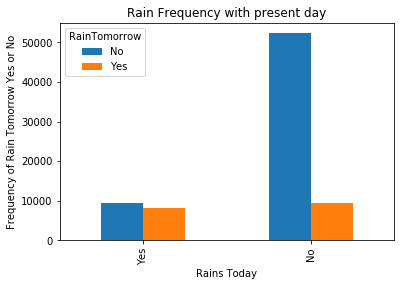

In [156]:
%matplotlib inline
pd.crosstab(categorical_data.RainToday,categorical_data.RainTomorrow).plot(kind='bar')
plt.title('Rain Frequency with present day')
plt.xlabel('Rains Today')
plt.ylabel('Frequency of Rain Tomorrow Yes or No')

In [157]:
# simply change yes/no to 1/0 for RainToday and RainTomorrow

categorical_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
categorical_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

#See unique values and convert them to int using pd.getDummies()
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    print(np.unique(categorical_data[col]))
# transform the categorical columns
categorical_data = pd.get_dummies(categorical_data, columns=categorical_columns)

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


In [158]:
y = categorical_data.RainTomorrow

In [159]:
from sklearn.feature_selection import chi2


chi2, pval = chi2(categorical_data,y)

In [160]:
cat_var = pd.DataFrame(pval < 0.05,categorical_data.columns)

In [161]:
cat_var.columns

RangeIndex(start=0, stop=1, step=1)

In [162]:
type(cat_var)

pandas.core.frame.DataFrame

In [163]:
np.where(cat_var[0] == True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 35, 36, 37,
        38, 39, 40, 41, 42, 43, 44, 47, 48, 49], dtype=int64),)

In [164]:
select_indices = list(np.where(cat_var[0] == True)[0])

CAT = cat_var.iloc[select_indices]

In [165]:
categorical = CAT.index

In [166]:
len(categorical)

44

In [167]:
categorical_data.shape

(79413, 50)

In [168]:
data_vars=categorical_data.columns.values.tolist()
to_keep=[i for i in data_vars if i in categorical]

In [169]:
len(to_keep)

44

In [170]:
df1=categorical_data[to_keep]
df1.columns.values

array(['RainToday', 'RainTomorrow', 'WindGustDir_E', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW',
       'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SW',
       'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW',
       'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N',
       'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir9am_E',
       'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N',
       'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW'], dtype=object)

In [171]:
df1.drop(['RainTomorrow'],axis = 1, inplace = True)

In [178]:
# Numerical Data

corr = numerical_data.corr()
corr
numerical_data = df.select_dtypes(include=('int64','float64'))

In [179]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIFfunc(x):
    data_mat = x.as_matrix()
    vif = [variance_inflation_factor(data_mat,i) for i in range(data_mat.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['columns'] = x.columns
    vif_factors['vif'] = vif
    return vif_factors

VIFfunc(numerical_data)

,columns,vif
0,MinTemp,43.725823
1,MaxTemp,531.538621
2,Rainfall,1.238686
3,WindGustSpeed,24.481809
4,WindSpeed9am,7.701307
5,WindSpeed3pm,12.486349
6,Humidity9am,55.836964
7,Humidity3pm,44.088102
8,Pressure9am,378580.909896
9,Pressure3pm,375915.847371


- Here, There is high Variance between Pressure9am and Pressure3pm so, droping Pressure9am column

In [180]:
numerical_data.drop(['Pressure9am'],axis = 1, inplace = True)

In [181]:
VIFfunc(numerical_data)

,columns,vif
0,MinTemp,42.450235
1,MaxTemp,528.126893
2,Rainfall,1.231244
3,WindGustSpeed,24.439054
4,WindSpeed9am,7.678150
5,WindSpeed3pm,12.481724
6,Humidity9am,55.126140
7,Humidity3pm,42.049558
8,Pressure3pm,107.624349
9,Temp9am,182.062413


In [182]:
numerical_data.shape

(79413, 11)

In [183]:
numerical_data.drop(['Temp3pm'],axis = 1, inplace = True)

In [184]:
VIFfunc(numerical_data)

,columns,vif
0,MinTemp,42.225966
1,MaxTemp,143.125921
2,Rainfall,1.228312
3,WindGustSpeed,23.639555
4,WindSpeed9am,7.644492
5,WindSpeed3pm,12.477637
6,Humidity9am,48.925687
7,Humidity3pm,30.009094
8,Pressure3pm,103.048992
9,Temp9am,174.780662


In [185]:
numerical_data.drop(['Temp9am'],axis = 1, inplace = True)

In [186]:
VIFfunc(numerical_data)

,columns,vif
0,MinTemp,21.730070
1,MaxTemp,66.958369
2,Rainfall,1.226025
3,WindGustSpeed,23.247201
4,WindSpeed9am,7.557954
5,WindSpeed3pm,11.963621
6,Humidity9am,31.901943
7,Humidity3pm,23.213569
8,Pressure3pm,100.028214


In [187]:
numerical_data.drop(['Pressure3pm'],axis = 1, inplace = True)

In [188]:
VIFfunc(numerical_data)

,columns,vif
0,MinTemp,15.407957
1,MaxTemp,24.965807
2,Rainfall,1.198280
3,WindGustSpeed,22.244440
4,WindSpeed9am,7.012036
5,WindSpeed3pm,11.963123
6,Humidity9am,24.509396
7,Humidity3pm,19.469679


In [189]:
numerical_data.drop(['MaxTemp'],axis = 1, inplace = True)

In [190]:
VIFfunc(numerical_data)

,columns,vif
0,MinTemp,4.647624
1,Rainfall,1.141151
2,WindGustSpeed,19.935058
3,WindSpeed9am,6.988526
4,WindSpeed3pm,11.948414
5,Humidity9am,16.374042
6,Humidity3pm,14.025296


In [191]:
numerical_data.drop(['WindGustSpeed'],axis = 1, inplace = True)

In [192]:
VIFfunc(numerical_data)

,columns,vif
0,MinTemp,4.396541
1,Rainfall,1.139975
2,WindSpeed9am,5.588892
3,WindSpeed3pm,7.862908
4,Humidity9am,14.953758
5,Humidity3pm,13.907869


- Here, **Making Assumption that if the VIF < 20** columns are there in the data 

In [193]:
df2 = numerical_data

In [194]:
df2.shape

(79413, 6)

In [195]:
df1.shape

(79413, 43)

In [196]:
data = pd.concat([df1,df2],axis = 1)

In [197]:
#next step is to standardize our data - using MinMaxScaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(data)
df = pd.DataFrame(scaler.transform(data), index=data.index, columns=data.columns)
df.iloc[1:5]

,RainToday,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_SE,...,WindDir9am_SSE,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,MinTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.334963,0.0,0.129412,0.200000,0.646465,0.37
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.322738,0.0,0.058824,0.047059,0.707071,0.28
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.508557,0.0,0.129412,0.482353,0.646465,0.76
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.498778,0.0,0.058824,0.152941,0.606061,0.46


In [203]:
import statsmodels.api as sm

logit_model=sm.Logit(y,df)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.422621
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           RainTomorrow   No. Observations:                79413
Model:                          Logit   Df Residuals:                    79365
Method:                           MLE   Df Model:                           47
Date:                Fri, 31 May 2019   Pseudo R-squ.:                  0.2022
Time:                        14:23:07   Log-Likelihood:                -33562.
converged:                       True   LL-Null:                       -42069.
                                        LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
RainToday           0.9729      0.026     37.003      0.000       0.921       1.024
WindGustDir_E 

- The p-values for all the variables should be lessthan 0.05 then they are significant to the model.

In [204]:
df.drop('WindDir9am_NNE',axis = 1,inplace = True)

In [205]:
import statsmodels.api as sm

logit_model=sm.Logit(y,df)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.422621
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           RainTomorrow   No. Observations:                79413
Model:                          Logit   Df Residuals:                    79366
Method:                           MLE   Df Model:                           46
Date:                Fri, 31 May 2019   Pseudo R-squ.:                  0.2022
Time:                        14:23:56   Log-Likelihood:                -33562.
converged:                       True   LL-Null:                       -42069.
                                        LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
RainToday           0.9734      0.026     37.131      0.000       0.922       1.025
WindGustDir_E 

In [207]:
df.drop(['WindDir9am_N','WindDir3pm_WNW','WindDir3pm_NNW'],axis = 1,inplace = True)

In [208]:
logit_model=sm.Logit(y,df)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.422668
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           RainTomorrow   No. Observations:                79413
Model:                          Logit   Df Residuals:                    79369
Method:                           MLE   Df Model:                           43
Date:                Fri, 31 May 2019   Pseudo R-squ.:                  0.2021
Time:                        14:25:58   Log-Likelihood:                -33565.
converged:                       True   LL-Null:                       -42069.
                                        LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
RainToday           0.9751      0.026     37.254      0.000       0.924       1.026
WindGustDir_E 

## The p-values for all the variables are lessthan 0.05 therefore, most of them are significant to the model.

In [209]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.25)
clf_logreg = LogisticRegression(random_state=0)
clf_logreg.fit(X_train,y_train)
y_pred = clf_logreg.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.8360531882744031
Time taken : 1.0977025032043457


In [213]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[13087  2446]
 [ 2161  2160]]


In [214]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     15533
           1       0.47      0.50      0.48      4321

   micro avg       0.77      0.77      0.77     19854
   macro avg       0.66      0.67      0.67     19854
weighted avg       0.77      0.77      0.77     19854



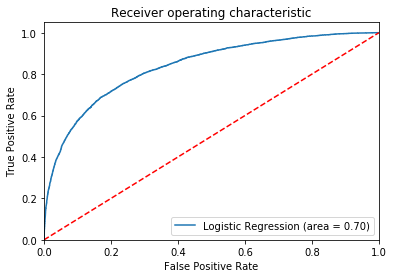

In [217]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, clf_logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, clf_logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [210]:
#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.25)
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
clf_rf.fit(X_train,y_train)
y_pred = clf_rf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.8167119975823511
Time taken : 5.4835875034332275


In [212]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.25)
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.7679560793794701
Time taken : 1.8556079864501953


In [218]:
#Support Vector Machine
from sklearn import svm
from sklearn.model_selection import train_test_split

t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.25)
clf_svc = svm.SVC(kernel='linear')
clf_svc.fit(X_train,y_train)
y_pred = clf_svc.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.8369598065880931
Time taken : 404.91038250923157
